# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
sales_data = pd.read_csv("C:\\Users\\PUNEET SINGH\\Advertising.csv")
sales_data.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
sales_data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [4]:
sales_data.describe()                        # can check missing values from this set

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


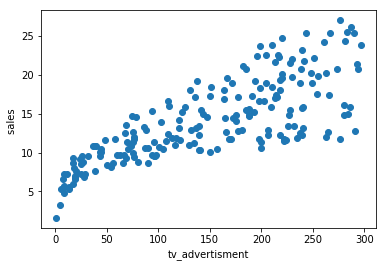

In [5]:
# bivariate anyalysis 
plt.scatter(sales_data['TV'],sales_data['sales'])
plt.xlabel('tv_advertisment')
plt.ylabel('sales ')

plt.show()

In [6]:
##### checking for correlation#####
sales_data['newspaper'].corr(sales_data['sales'])

0.22829902637616528

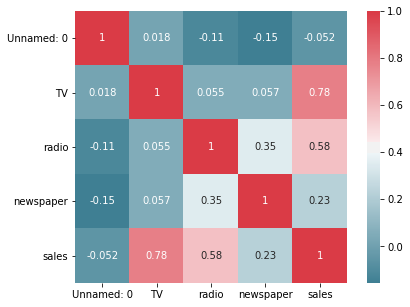

In [7]:
cnames = ['TV','radio','newspaper']
f,ax = plt.subplots(figsize = (7,5))
corr = sales_data.corr()
# plotting a heatmap for the correlation
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot=True)
plt.show()


In [8]:
############ checking for the outliers#########

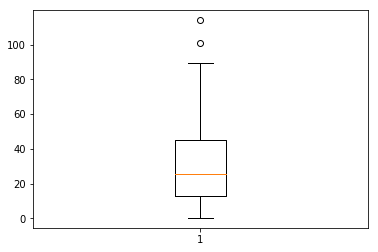

In [9]:
plt.boxplot(sales_data['newspaper'])
plt.show()                    

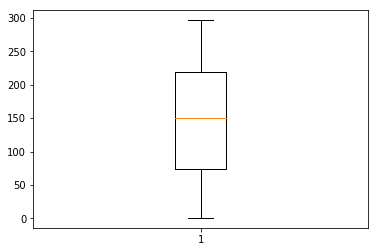

In [10]:
plt.boxplot(sales_data['TV'])
plt.show()

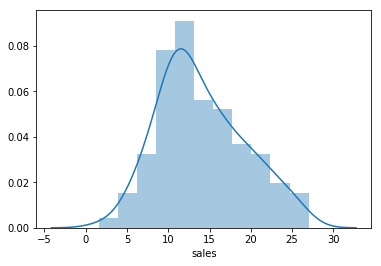

In [11]:
# density curve
sns.distplot(sales_data['sales'])
plt.show()

In [12]:
# creating train_test dataset
x = sales_data.loc[:,['TV','radio','newspaper']].values
y = sales_data.loc[:,'sales'].values

#  splitting the dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(150, 3) (150,) (50, 3) (50,)


In [15]:
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(150, 1)


In [16]:
y_test = y_test.reshape(-1,1)
print(y_test.shape)

(50, 1)


# MULTIPLE LINEAR REGRESSION

In [17]:
# IMPORTING THE LIBREARY
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regression.score(x,y)

0.8954316142501197

In [ ]:
# MODEL HAS BEEN TRAINED WITH 90 % WHICH IS GOOD

In [20]:
pred_y = regression.predict(x_test)
pred_y.shape

(50, 1)

In [21]:
#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, pred_y))

1.300032091923545


In [23]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, pred_y))

4.0124975229171


In [24]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

2.003121944095541


In [35]:
from sklearn.metrics import r2_score

In [36]:
score = r2_score(y_test, pred_y)
score

0.9235848328275414

In [ ]:
# MULTIPLE REGRESSION MODEL IS PREDICTING THE SCORE 92.3% WHICH IS VERY GOOD

# DECISION TREE MODEL

In [25]:
# Importing the library
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [41]:
pred = regressor.predict(x_test)
print(pred)

[11.8  7.6  9.5 25.5 12.8  8.6  6.6 12.5  8.8 16.6 25.5 10.6 10.3 15.5
 12.  11.9 15.9  6.6 11.3 17.4 25.5 10.3 16.6 12.2  8.6 14.2 14.1 20.7
 10.6  7.  13.3 19.2 15.7 22.3  5.5  6.6  9.7 14.7 11.3  6.9 13.3  7.6
 17.3 15.2 17.4 14.2  5.7  9.3 16.  11. ]


In [44]:
regressor.score(x_train,y_train)*100

100.0

In [47]:
# MODEL HAS BEEN TRAINED WITH 100% ACCURACY WHICH LATER MIGHT BE A PROBLEM AND IS A CASE OF OVERFITTING OF THE DATA

In [46]:
score = r2_score(y_test, pred)*100
score

92.35848328275415

In [48]:
# DECISION TREE MODEL HAS PREDICTED THE RESULT WITH 92.35%

In [49]:
#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, pred_y))

0.9980000000000001


In [50]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, pred_y))

2.1538


In [30]:
########## ON THE BASIS OF MODEL SCORE AND MAE SCORE DECISION TREE IS PREDICTING MORE CORRECT PREDICTION THAN MULTIPLE LINEAR


In [51]:
# USING THE BAGGING BEST MODEL RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10)
reg.fit(x_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [52]:
pred = reg.predict(x_test)

In [53]:
#calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, pred))

0.7752000000000003


In [54]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, pred))

1.2170080000000003


In [ ]:
# ON THE PREVIOUS RESULTS DECISION TREE IS THE BEST MODEL SUITED FOR THIS DATSET AS THE MODEL HAS PREDICTED 92% CORRECT.